In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [51]:
data = pd.read_csv("countries_of_the_world.csv",  decimal=",")
data.shape
data.info() #Net migration, Literacy (%), Climate,  Deathrate, Industry,   Service, Infant mortality (per 1000 births), GDP 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

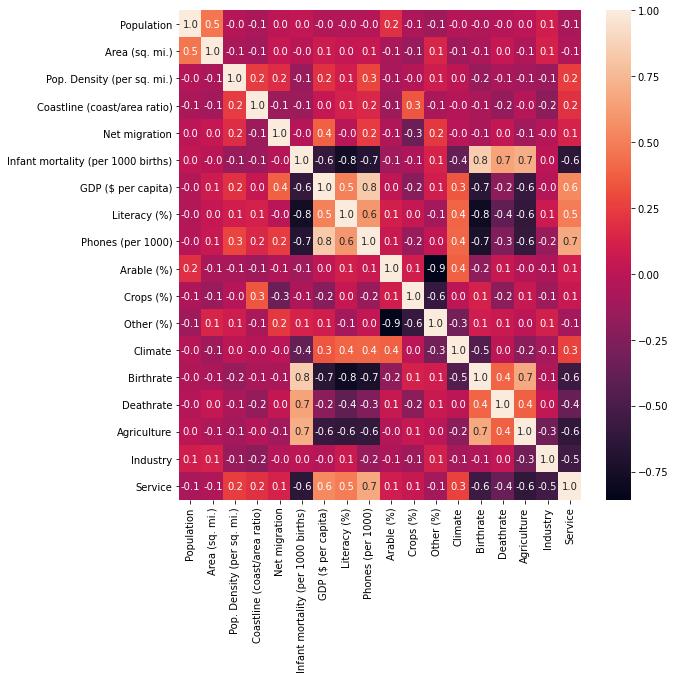

In [52]:
data.describe()# treba skalirati podatke...

import seaborn as sns 

plt.figure(figsize=(9, 9))
sns.heatmap(data = data.corr(), fmt=".1f", annot = True)


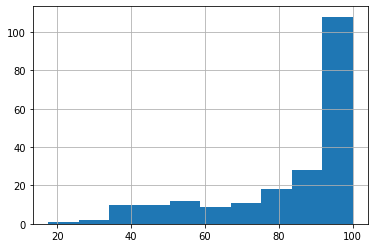

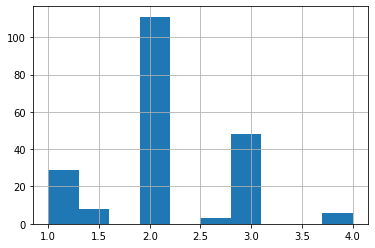

In [53]:
data["Literacy (%)"].hist()
plt.show()
data["Climate"].hist()
plt.show()
### preprocessing (dealing with null vals) ###
data = data.drop(columns = ["Region"], axis = 1)

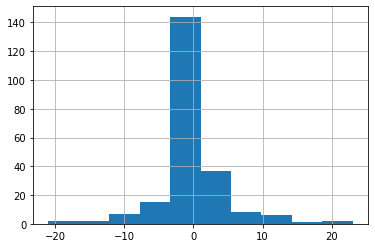

In [54]:
data["Net migration"].hist()

data_ord_net_mig = data.sort_values(by="Net migration", ascending=False)
data_ord_net_mig.head(10)

from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan ,strategy="median")

cols_non_obj = data.select_dtypes(exclude="object").columns

data.loc[:, cols_non_obj] = si.fit_transform(data.loc[:, cols_non_obj])


In [55]:
data.info() # no missing vals now:
### Scaling data #### 

from sklearn.preprocessing import StandardScaler

ssc = StandardScaler()
data.drop(columns = ["Country"], axis = 1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Population                          227 non-null    float64
 2   Area (sq. mi.)                      227 non-null    float64
 3   Pop. Density (per sq. mi.)          227 non-null    float64
 4   Coastline (coast/area ratio)        227 non-null    float64
 5   Net migration                       227 non-null    float64
 6   Infant mortality (per 1000 births)  227 non-null    float64
 7   GDP ($ per capita)                  227 non-null    float64
 8   Literacy (%)                        227 non-null    float64
 9   Phones (per 1000)                   227 non-null    float64
 10  Arable (%)                          227 non-null    float64
 11  Crops (%)                           227 non-n

In [63]:
dataX = data.drop(columns =["Net migration"], axis = 1)
dataY =  data[["Net migration"]]

### train / test separation data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, random_state = 3, test_size = 0.3)
X_train = ssc.fit_transform(X_train) # scaling data

In [64]:
### regression analysis:
from sklearn.cvm import SVR, SVC

svr = SVR()
svr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [65]:
X_test = ssc.fit_transform(X_test)
y_pres = svr.predict(X_test)
print("Error: ", svr.score(X_test, y_test)) # 0.09 (error)

Error:  0.09688455163747145


In [71]:
## PCA ==> 5 important features and then make prediction: 
from sklearn.decomposition import PCA

pca = PCA(n_components = 8)
dataX_pca = pca.fit_transform(dataX)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(dataX_pca, dataY, random_state = 3, test_size = 0.3)
X_train_pca = ssc.fit_transform(X_train_pca) # scaling data after pca
X_test_pca = ssc.fit_transform(X_test_pca) # scaling data after pca

svr = SVR()
svr.fit(X_train_pca, y_train_pca)
print("Error after pca: ", svr.score(X_test_pca, y_test_pca)) # 0.08 (error)

Error after pca:  0.07993855589615151


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
### another regessors to try:
from sklearn.linear_model import BayesianRidge
brr = BayesianRidge()
brr.fit(X_train_pca, y_train_pca)
print("Score of GaussianNB: ", brr.score(X_test_pca, y_test_pca)) # 0.09


Score of GaussianNB:  0.09232056707309888


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
